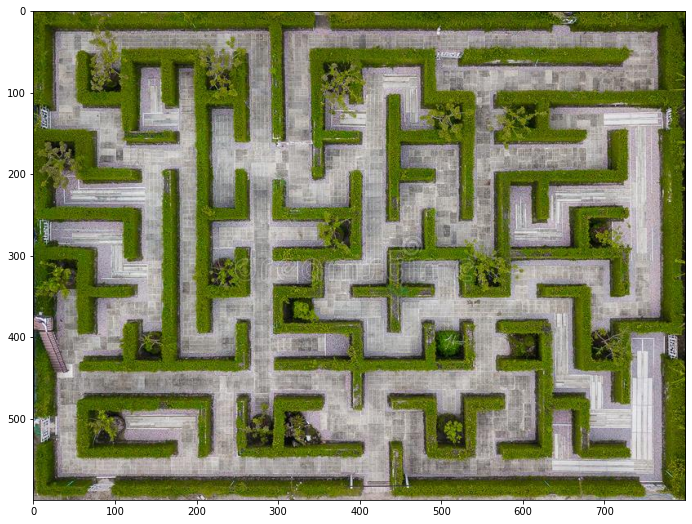

In [112]:
# READ IMAGE

import cv2 
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)
from algorithms import BFS, DFS, Tremaux, Deadend
from utils.plotting import imshow

DEBUG = False

image1 = cv2.imread('images/maze_2.jpg') 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
source = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(source)

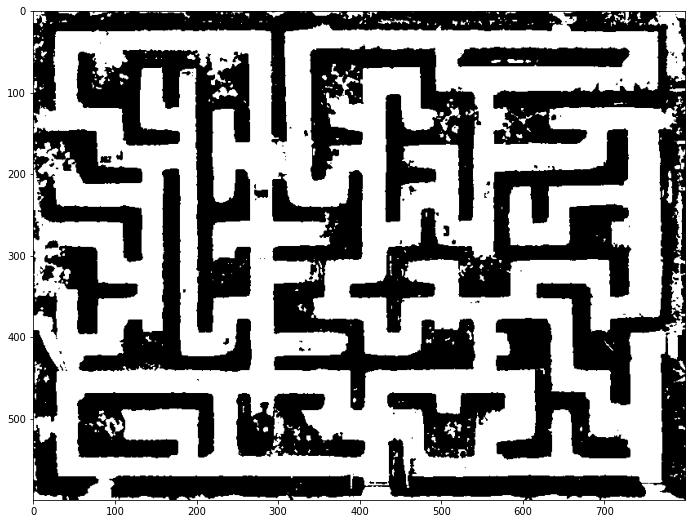

In [113]:
# THRESHOLD IMAGE
blur_img = cv2.GaussianBlur(img, (27,27), 1)
thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 91, 10)
plt.imshow(thresh2, cmap='gray')

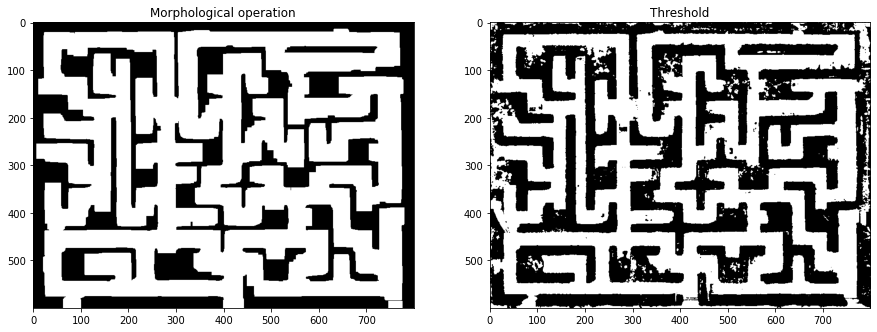

In [114]:
# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

img_erosion = cv2.erode(thresh2, get_kernel(19), iterations=1)
img_dilation = cv2.dilate(img_erosion, get_kernel(29), iterations=1)

subplot = plt.subplot(1, 2, 1)
subplot.set_title("Morphological operation")
subplot.imshow(img_dilation, cmap='gray')
subplot = plt.subplot(1, 2, 2)
subplot.set_title("Threshold")
subplot.imshow(thresh2, cmap='gray')


In [115]:
# MAX POOL IMAGE

step = 16
print(img_dilation.shape) # 600 800
T = int(step*step*255/1.2)
new_image = np.full(img_dilation.shape, 0)
for i in range(0, 800, step):
    for j in range(0, 600, step):
        area = img_dilation[j:j+step, i:i+step]
        if np.sum(area) > T:
            new_image[j:j+step, i:i+step] += 255

(600, 800)


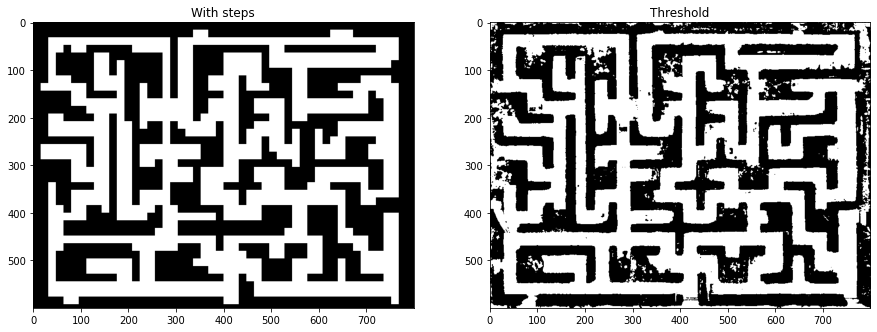

In [116]:
subplot = plt.subplot(1, 2, 1)
subplot.set_title("With steps")
subplot.imshow(new_image, cmap='gray')
subplot = plt.subplot(1, 2, 2)
subplot.set_title("Threshold")
subplot.imshow(thresh2, cmap='gray')

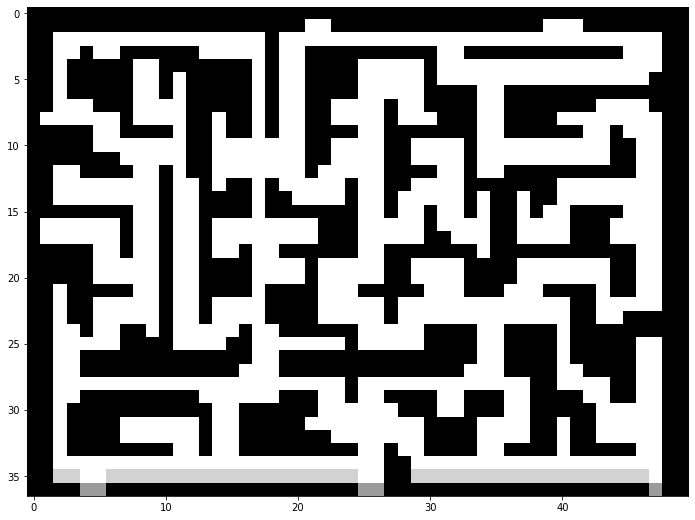

In [117]:
# RESIZE IMAGE

resized_img = cv2.resize(new_image, (new_image.shape[1]//step, new_image.shape[0]//step), interpolation = cv2.INTER_LINEAR_EXACT)
plt.imshow(resized_img, cmap='gray')

In [118]:
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!


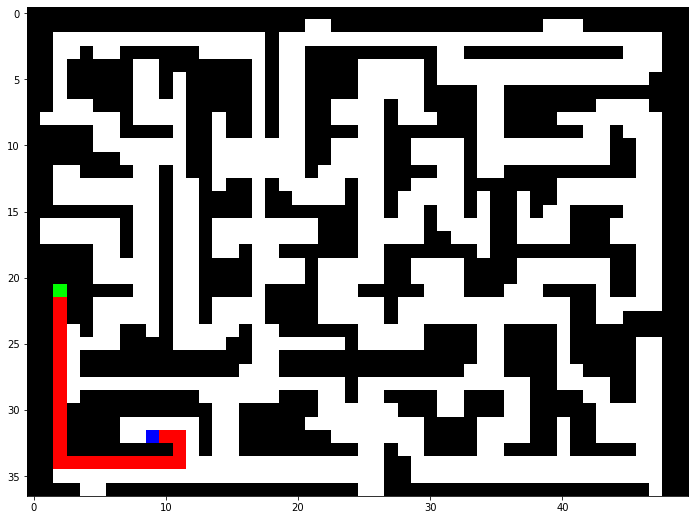

In [121]:
# SOLVE MAZE
start = 21, 2
finish = 32, 9

bfs = BFS(image_maze_gray, start=start, finish=finish)
bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=1))